In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

# Data Generation

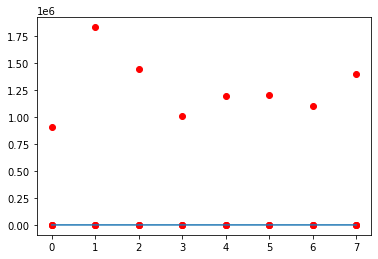

In [2]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

plt.plot(x_train, 'ro')
plt.plot(y_train)
plt.show()

In [3]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

# Weight Initialization

In [4]:
W = tf.Variable(tf.random.normal((4, 1)), dtype=tf.float32)
b = tf.Variable(tf.random.normal((1,)), dtype=tf.float32)

# Hypothesis

In [5]:
def linearReg_fn(features):
    hypothesis = tf.matmul(features, W) + b
    return hypothesis

# Cost Function

In [6]:
def loss_fn(hypothesis, features, labels):
    cost = tf.reduce_mean(tf.square(hypothesis - labels))
    return cost

## Gradient Descent

In [7]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5)

def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(linearReg_fn(features),features,labels)
    return tape.gradient(loss_value, [W,b]), loss_value

# Experiment
- 정규화 없이 해서 Nan 값이 나온다.

In [8]:
EPOCHS = 101

for step in range(EPOCHS):
    for features, labels  in dataset:
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        hypo_value = linearReg_fn(features)
        grads, loss_value = grad(linearReg_fn(features), features, labels)        
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))    
    print("Iter: {}, Loss: {:.4f}, Prediction: {}".format(step, loss_value, hypo_value))

Iter: 0, Loss: 1560538513408.0000, Prediction: [[ 881739.25]
 [1775079.6 ]
 [1396381.8 ]
 [ 978841.9 ]
 [1153627.  ]
 [1163335.  ]
 [1066234.6 ]
 [1357535.1 ]]
Iter: 1, Loss: 1714533365800697223331184640.0000, Prediction: [[-2.9208166e+13]
 [-5.8799033e+13]
 [-4.6255078e+13]
 [-3.2424564e+13]
 [-3.8214081e+13]
 [-3.8535722e+13]
 [-3.5319324e+13]
 [-4.4968517e+13]]
Iter: 2, Loss: inf, Prediction: [[9.68144160e+20]
 [1.94897341e+21]
 [1.53318716e+21]
 [1.07475597e+21]
 [1.26665738e+21]
 [1.27731867e+21]
 [1.17070664e+21]
 [1.49054244e+21]]
Iter: 3, Loss: inf, Prediction: [[-3.2090447e+28]
 [-6.4601360e+28]
 [-5.0819563e+28]
 [-3.5624241e+28]
 [-4.1985073e+28]
 [-4.2338452e+28]
 [-3.8804656e+28]
 [-4.9406045e+28]]
Iter: 4, Loss: inf, Prediction: [[1.0636813e+36]
 [2.1412995e+36]
 [1.6844831e+36]
 [1.1808136e+36]
 [1.3916522e+36]
 [1.4033654e+36]
 [1.2862328e+36]
 [1.6376300e+36]]
Iter: 5, Loss: inf, Prediction: [[-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]]
Iter: 6, Loss